In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [5]:
toy_officer_data = pd.read_csv('toy.officer_data.csv')

In [6]:
toy_officer_data.describe()

,birth.year,age,primary,secondary,tertiary,officer_id
count,3884.000000,3883.000000,3884.000000,3884.000000,3884.000000,3884.000000
mean,1972.872039,42.552408,0.021112,0.245623,0.733265,1942.500000
std,8.156141,8.162790,0.143777,0.430511,0.442310,1121.358551
min,1927.000000,23.000000,0.000000,0.000000,0.000000,1.000000
25%,1968.000000,36.000000,0.000000,0.000000,0.000000,971.750000
50%,1974.000000,42.000000,0.000000,0.000000,1.000000,1942.500000
75%,1979.000000,48.000000,0.000000,0.000000,1.000000,2913.250000
max,1993.000000,88.000000,1.000000,1.000000,1.000000,3884.000000


In [7]:
toy_officer_data.head()

,first.name,last.name,appointed.date,race,gender,birth.year,age,rank,primary,secondary,tertiary,officer_id
0,KARINA,AARON,2005-09-26,HISPANIC,FEMALE,1980,35.0,POLICE OFFICER,0,1,0,1139
1,AZIZ,ABDELMAJEID,2008-04-28,A_OTHER,MALE,1984,31.0,POLICE OFFICER,0,0,1,434
2,JENNIFER,ACCARDO,2004-11-29,WHITE,FEMALE,1979,37.0,POLICE OFFICER,0,0,1,2515
3,ROSEMARY,ACCARDO,1986-08-11,WHITE,FEMALE,1952,63.0,POLICE OFFICER,0,0,1,1149
4,THOMAS,ACCARDO,2001-04-30,WHITE,MALE,1967,49.0,POLICE OFFICER,0,1,0,2134


In [8]:
toy_officer_data['appointed.date'] = pd.to_datetime(toy_officer_data['appointed.date'])

In [9]:
toy_complaint_data = pd.read_csv('toy.complaint_data.csv')

In [10]:
toy_complaint_data.describe()

,crid,beat_2012_geocoded,officer_id
count,1.384000e+04,8823.000000,13840.000000
mean,1.052031e+06,999.446560,1367.035766
std,1.719185e+04,612.579999,1017.437092
min,1.022797e+06,113.000000,1.000000
25%,1.036688e+06,612.000000,506.000000
50%,1.052321e+06,735.000000,1147.500000
75%,1.067246e+06,1134.000000,2084.000000
max,1.082661e+06,3100.000000,3884.000000


In [11]:
toy_complaint_data.head()

,crid,incident_date,beat_2012_geocoded,complaintcategory,finalfinding,officer_id
0,1022797,01-Jan-2009 0:08,NaN,03G-MISCELLANEOUS,EX,1
1,1022797,01-Jan-2009 0:08,NaN,03G-MISCELLANEOUS,EX,2
2,1022797,01-Jan-2009 0:08,NaN,03G-MISCELLANEOUS,EX,3
3,1022797,01-Jan-2009 0:08,NaN,03G-MISCELLANEOUS,EX,4
4,1022797,01-Jan-2009 0:08,NaN,03G-MISCELLANEOUS,EX,5


In [32]:
toy_complaint_data[['officer_id', 'crid']].groupby('officer_id').agg("count").describe()

,crid
count,3884.000000
mean,3.563337
std,4.434762
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,42.000000


In [12]:
#appointed date by gender

In [15]:
from dateutil import parser

toy_complaint_data['incident_date'] = [parser.parse(x) for x in toy_complaint_data['incident_date']]

In [21]:
toy_complaint_data_2016 = toy_complaint_data[(toy_complaint_data['incident_date'] > '2016-01-01')]

In [23]:
toy_complaint_data_2016[['crid','officer_id']].to_csv("two_col_2016.csv", index=False)

In [23]:
toy_complaint_data[['crid','officer_id']]

,crid,officer_id
0,1022797,1
1,1022797,2
2,1022797,3
3,1022797,4
4,1022797,5
5,1022797,6
6,1022797,7
7,1022797,8
8,1022845,9
9,1022845,10


In [33]:
toy_complaint_data_2016[['officer_id', 'crid']].groupby('officer_id').agg("count").describe()

,crid
count,335.000000
mean,1.205970
std,0.503842
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,4.000000


In [24]:
import networkx as nx

In [25]:
#building correlation esque matrix

In [26]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import math
import scipy as sp
from scipy.sparse import linalg, csr_matrix
from operator import itemgetter
import scipy.stats as stats
from numpy import genfromtxt

from scipy.sparse.linalg import eigsh
from scipy.sparse import diags
from scipy.spatial.distance import cosine as cosine_distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import seaborn as sns
from collections import defaultdict
from random import shuffle
%matplotlib inline

/Users/pujaarajan/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [27]:
def read_network(fn, undirected = True):
    edges = list()
    nodes_id = dict()
    node_counter = -1
    with open(fn, 'r') as f:
        for i, line in enumerate(f):
            nodei, nodej = line.rstrip('\n').split(",")
            if nodei not in nodes_id:
                node_counter += 1
                nodes_id[nodei] = node_counter
            if nodej not in nodes_id:
                node_counter += 1
                nodes_id[nodej] = node_counter
            
            edges.append((nodei, nodej))
            
    A = np.zeros((node_counter + 1, node_counter + 1), dtype = float)
    for e in edges:
        i = nodes_id[e[0]]
        j = nodes_id[e[1]]
        A[i, j] = 1.0
        if undirected:
            A[j, i] = 1.0
     
    return A, node_counter + 1


In [28]:
A, N = read_network('two_col.txt', undirected = True) 

G = nx.from_numpy_matrix(A)

In [ ]:
plt.matshow(A)
plt.show()

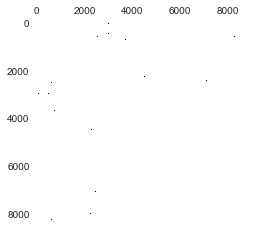

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import scipy
import scipy.io
%matplotlib inline

plt.spy(A)
# Continue here
#

def MCL(A, tol, p, alpha):
    step = 1
    col_sums = A.sum(axis = 0)
    T = A / col_sums[np.newaxis, :]
    M = T
    while(1):
        print 'step ', step
        step += 1
        # Expancion step:
        M1 = np.linalg.matrix_power(M, p)
        # Inflation step:
        M1 = np.power(M1, alpha)
        col_sums = M1.sum(axis = 0)
        M1 = M1 / col_sums[np.newaxis, :]
        M1[M1<=tol] = 0
        if np.linalg.norm(M - M1) == 0:
            return M1
        else:
            M = M1.copy()